In [1]:
# Loading necessary libraries
%matplotlib inline  
import numpy as np
import matplotlib.pyplot as plt  # for graphics
import seaborn as sns; sns.set()   # also for colored graphs, heat maps
from sklearn.datasets import fetch_20newsgroups  # load data from sklearn dataset
from sklearn.feature_extraction.text import TfidfVectorizer  # for coverting text to vectors
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline 
from sklearn.metrics import confusion_matrix #Creating confusion matrix and heat map
from sklearn.metrics import classification_report,accuracy_score
from sklearn.linear_model import LogisticRegression
data=fetch_20newsgroups()
folders = data.target_names   # list all categories

In [2]:
categories=data.target_names
# Training the data on these categories
train=fetch_20newsgroups(subset='train', categories=categories)
# Testing the data for these categories
test=fetch_20newsgroups(subset='test', categories=categories)

In [3]:
# See how many training examples
print(len(train.data))

11314


In [4]:
# See how many test examples
print(len(test.data))

7532


In [5]:
tenPercentTrainSet = train.data[0:1131] #Created new train set for 10 percent of the original test set.
tenPercentTrainTarget = train.target[0:1131]
tenPercentTrainTargetNames = train.target_names[0:1331]

In [6]:
print(tenPercentTrainSet)

["From: lerxst@wam.umd.edu (where's my thing)\nSubject: WHAT car is this!?\nNntp-Posting-Host: rac3.wam.umd.edu\nOrganization: University of Maryland, College Park\nLines: 15\n\n I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n", "From: guykuo@carson.u.washington.edu (Guy Kuo)\nSubject: SI Clock Poll - Final Call\nSummary: Final call for SI clock reports\nKeywords: SI,acceleration,clock,upgrade\nArticle-I.D.: shelley.1qvfo9INNc3s\nOrganization: University of Washington\nLines: 1

In [7]:
print(test.data[0])

From: v064mb9k@ubvmsd.cc.buffalo.edu (NEIL B. GANDLER)
Subject: Need info on 88-89 Bonneville
Organization: University at Buffalo
Lines: 10
News-Software: VAX/VMS VNEWS 1.41
Nntp-Posting-Host: ubvmsd.cc.buffalo.edu


 I am a little confused on all of the models of the 88-89 bonnevilles.
I have heard of the LE SE LSE SSE SSEI. Could someone tell me the
differences are far as features or performance. I am also curious to
know what the book value is for prefereably the 89 model. And how much
less than book value can you usually get them for. In other words how
much are they in demand this time of year. I have heard that the mid-spring
early summer is the best time to buy.

			Neil Gandler



In [8]:
print(tenPercentTrainSet[0])

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----







In [9]:
thirtyPercentTrainSet = train.data[0:3394] #Created new train set for 30 percent of the original test set.
thirtyPercentTrainTarget = train.target[0:3394]
thirtyPercentTrainTargetNames = train.target_names[0:3394]

In [10]:
fiftyPercentTrainSet = train.data[0:5657] #Created new train set for 50 percent of the original test set.
fiftyPercentTrainTarget = train.target[0:5657]
fiftyPercentTrainTargetNames = train.target_names[0:5657]

In [11]:
###########  NAIVE BAYES  ##############
###### MODEL WITH 10% TRAIN SET
#Creating a model based on Multinomial Naive Bayes
model=make_pipeline(TfidfVectorizer(), MultinomialNB())
# Training the model with the train data
model.fit(tenPercentTrainSet,tenPercentTrainTarget)
#creating labels for the test data
labels=model.predict(test.data)

Text(92.68,0.5,'Predicted labels')

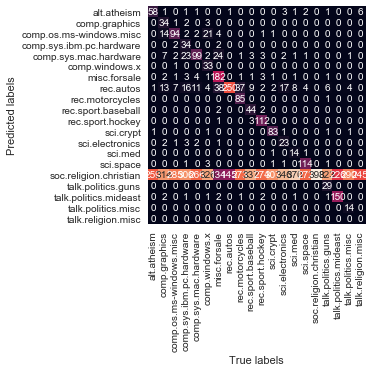

In [12]:
mat=confusion_matrix(test.target,labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False
           , xticklabels=tenPercentTrainTargetNames
           , yticklabels=tenPercentTrainTargetNames)
plt.xlabel("True labels")
plt.ylabel("Predicted labels")

In [13]:
print('accuracy %s' % accuracy_score(labels, test.target))
print(classification_report(test.target, labels,target_names=categories))

accuracy 0.24561869357408392
                          precision    recall  f1-score   support

             alt.atheism       0.77      0.18      0.29       319
           comp.graphics       0.85      0.09      0.16       389
 comp.os.ms-windows.misc       0.68      0.24      0.35       394
comp.sys.ibm.pc.hardware       0.89      0.09      0.16       392
   comp.sys.mac.hardware       0.59      0.26      0.36       385
          comp.windows.x       0.97      0.08      0.15       395
            misc.forsale       0.91      0.47      0.62       390
               rec.autos       0.58      0.63      0.61       396
         rec.motorcycles       0.99      0.21      0.35       398
      rec.sport.baseball       0.92      0.11      0.20       397
        rec.sport.hockey       0.97      0.28      0.43       399
               sci.crypt       0.94      0.21      0.34       396
         sci.electronics       0.72      0.06      0.11       393
                 sci.med       0.88      0.04 

/Users/iremkaraoglu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [14]:
###### MODEL WITH 30% TRAIN SET
#Creating a model based on Multinomial Naive Bayes
model=make_pipeline(TfidfVectorizer(), MultinomialNB())
# Training the model with the train data
model.fit(thirtyPercentTrainSet,thirtyPercentTrainTarget)
#creating labels for the test data
labels=model.predict(test.data)

Text(92.68,0.5,'Predicted labels')

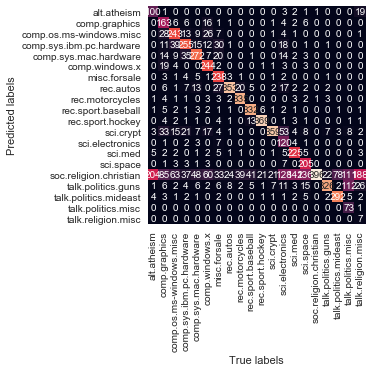

In [15]:
#Creating confusion matrix and heat map
mat=confusion_matrix(test.target,labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False
           , xticklabels=thirtyPercentTrainTargetNames
           , yticklabels=thirtyPercentTrainTargetNames)
plt.xlabel("True labels")
plt.ylabel("Predicted labels")

In [16]:
print('accuracy %s' % accuracy_score(labels, test.target))
print(classification_report(test.target, labels,target_names=categories))

accuracy 0.6514869888475836
                          precision    recall  f1-score   support

             alt.atheism       0.79      0.31      0.45       319
           comp.graphics       0.79      0.42      0.55       389
 comp.os.ms-windows.misc       0.73      0.62      0.67       394
comp.sys.ibm.pc.hardware       0.67      0.65      0.66       392
   comp.sys.mac.hardware       0.72      0.71      0.71       385
          comp.windows.x       0.88      0.62      0.73       395
            misc.forsale       0.92      0.61      0.73       390
               rec.autos       0.77      0.89      0.83       396
         rec.motorcycles       0.93      0.84      0.89       398
      rec.sport.baseball       0.92      0.84      0.88       397
        rec.sport.hockey       0.92      0.92      0.92       399
               sci.crypt       0.66      0.91      0.76       396
         sci.electronics       0.87      0.31      0.45       393
                 sci.med       0.87      0.57  

In [17]:
###### MODEL WITH 50% TRAIN SET
#Creating a model based on Multinomial Naive Bayes
model=make_pipeline(TfidfVectorizer(), MultinomialNB())
# Training the model with the train data
model.fit(fiftyPercentTrainSet,fiftyPercentTrainTarget)
#creating labels for the test data
labels=model.predict(test.data)

Text(92.68,0.5,'Predicted labels')

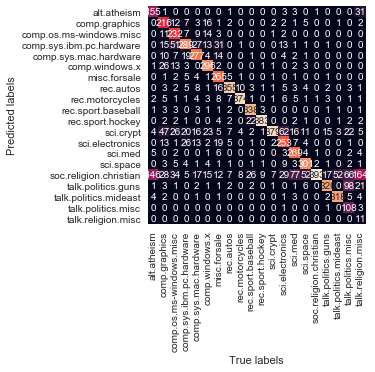

In [18]:
#Creating confusion matrix and heat map
mat=confusion_matrix(test.target,labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False
           , xticklabels=fiftyPercentTrainTargetNames
           , yticklabels=fiftyPercentTrainTargetNames)
plt.xlabel("True labels")
plt.ylabel("Predicted labels")

In [19]:
print('accuracy %s' % accuracy_score(labels, test.target))
print(classification_report(test.target, labels,target_names=categories))

accuracy 0.7344662772172066
                          precision    recall  f1-score   support

             alt.atheism       0.79      0.49      0.60       319
           comp.graphics       0.80      0.56      0.66       389
 comp.os.ms-windows.misc       0.83      0.59      0.69       394
comp.sys.ibm.pc.hardware       0.65      0.74      0.69       392
   comp.sys.mac.hardware       0.82      0.72      0.77       385
          comp.windows.x       0.85      0.75      0.80       395
            misc.forsale       0.92      0.68      0.78       390
               rec.autos       0.84      0.90      0.87       396
         rec.motorcycles       0.88      0.94      0.91       398
      rec.sport.baseball       0.94      0.85      0.90       397
        rec.sport.hockey       0.90      0.96      0.93       399
               sci.crypt       0.57      0.96      0.71       396
         sci.electronics       0.73      0.64      0.68       393
                 sci.med       0.91      0.68  

In [20]:
#Creating a model based on Multinomial Naive Bayes
model=make_pipeline(TfidfVectorizer(), MultinomialNB())
# Training the model with the train data
model.fit(train.data,train.target)
#creating labels for the test data
labels=model.predict(test.data)

Text(92.68,0.5,'Predicted labels')

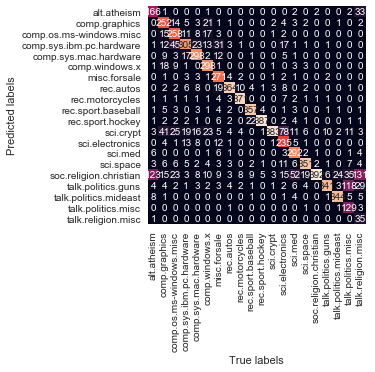

In [21]:
mat=confusion_matrix(test.target,labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False
           , xticklabels=train.target_names
           , yticklabels=train.target_names)
plt.xlabel("True labels")
plt.ylabel("Predicted labels")

In [22]:
print('accuracy %s' % accuracy_score(labels, test.target))
print(classification_report(test.target, labels,target_names=categories))

accuracy 0.7738980350504514
                          precision    recall  f1-score   support

             alt.atheism       0.80      0.52      0.63       319
           comp.graphics       0.81      0.65      0.72       389
 comp.os.ms-windows.misc       0.82      0.65      0.73       394
comp.sys.ibm.pc.hardware       0.67      0.78      0.72       392
   comp.sys.mac.hardware       0.86      0.77      0.81       385
          comp.windows.x       0.89      0.75      0.82       395
            misc.forsale       0.93      0.69      0.80       390
               rec.autos       0.85      0.92      0.88       396
         rec.motorcycles       0.94      0.93      0.93       398
      rec.sport.baseball       0.92      0.90      0.91       397
        rec.sport.hockey       0.89      0.97      0.93       399
               sci.crypt       0.59      0.97      0.74       396
         sci.electronics       0.84      0.60      0.70       393
                 sci.med       0.92      0.74  

In [23]:
#####LOGISTIC REGRESSION######
#Creating a model based on Logistic Regression
model=make_pipeline(TfidfVectorizer(), LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42))
# Training the model with the train data
model.fit(tenPercentTrainSet, tenPercentTrainTarget)
#creating labels for the test data
labels=model.predict(test.data)

Text(92.68,0.5,'Predicted labels')

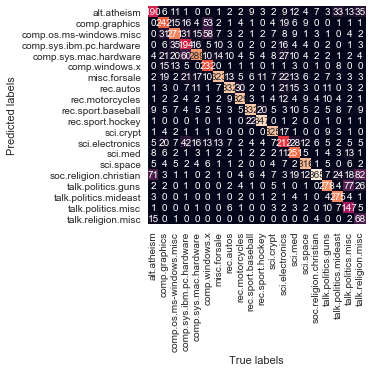

In [24]:
mat=confusion_matrix(test.target,labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False
           , xticklabels=tenPercentTrainTargetNames
           , yticklabels=tenPercentTrainTargetNames)
plt.xlabel("True labels")
plt.ylabel("Predicted labels")

In [25]:
print('accuracy %s' % accuracy_score(labels, test.target))
print(classification_report(test.target, labels,target_names=categories))

accuracy 0.7060541688794477
                          precision    recall  f1-score   support

             alt.atheism       0.55      0.60      0.57       319
           comp.graphics       0.64      0.62      0.63       389
 comp.os.ms-windows.misc       0.59      0.69      0.64       394
comp.sys.ibm.pc.hardware       0.64      0.49      0.56       392
   comp.sys.mac.hardware       0.58      0.75      0.65       385
          comp.windows.x       0.82      0.59      0.69       395
            misc.forsale       0.65      0.83      0.73       390
               rec.autos       0.74      0.84      0.78       396
         rec.motorcycles       0.81      0.83      0.82       398
      rec.sport.baseball       0.74      0.84      0.78       397
        rec.sport.hockey       0.92      0.87      0.89       399
               sci.crypt       0.89      0.82      0.85       396
         sci.electronics       0.51      0.54      0.52       393
                 sci.med       0.78      0.63  

In [26]:
# Training the model with the train data
model.fit(thirtyPercentTrainSet, thirtyPercentTrainTarget)
#creating labels for the test data
labels=model.predict(test.data)

Text(92.68,0.5,'Predicted labels')

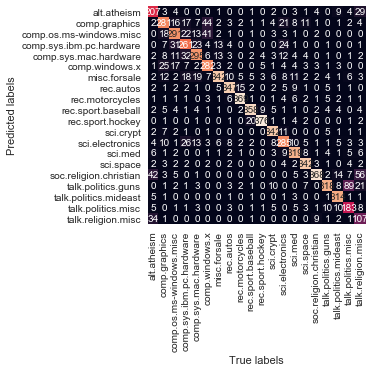

In [27]:
mat=confusion_matrix(test.target,labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False
           , xticklabels=thirtyPercentTrainTargetNames
           , yticklabels=thirtyPercentTrainTargetNames)
plt.xlabel("True labels")
plt.ylabel("Predicted labels")

In [28]:
print('accuracy %s' % accuracy_score(labels, test.target))
print(classification_report(test.target, labels,target_names=categories))

accuracy 0.794875199150292
                          precision    recall  f1-score   support

             alt.atheism       0.77      0.65      0.71       319
           comp.graphics       0.66      0.72      0.69       389
 comp.os.ms-windows.misc       0.73      0.74      0.73       394
comp.sys.ibm.pc.hardware       0.71      0.67      0.69       392
   comp.sys.mac.hardware       0.73      0.77      0.75       385
          comp.windows.x       0.78      0.71      0.74       395
            misc.forsale       0.73      0.88      0.80       390
               rec.autos       0.87      0.88      0.87       396
         rec.motorcycles       0.91      0.93      0.92       398
      rec.sport.baseball       0.88      0.90      0.89       397
        rec.sport.hockey       0.92      0.94      0.93       399
               sci.crypt       0.91      0.86      0.89       396
         sci.electronics       0.72      0.73      0.72       393
                 sci.med       0.86      0.81   

In [29]:
# Training the model with the train data
model.fit(fiftyPercentTrainSet, fiftyPercentTrainTarget)
#creating labels for the test data
labels=model.predict(test.data)

Text(92.68,0.5,'Predicted labels')

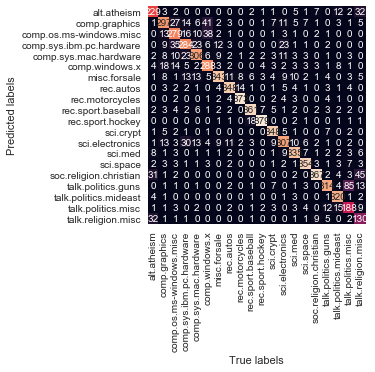

In [30]:
mat=confusion_matrix(test.target,labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False
           , xticklabels=fiftyPercentTrainTargetNames
           , yticklabels=fiftyPercentTrainTargetNames)
plt.xlabel("True labels")
plt.ylabel("Predicted labels")

In [31]:
print('accuracy %s' % accuracy_score(labels, test.target))
print(classification_report(test.target, labels,target_names=categories))

accuracy 0.8165161975570897
                          precision    recall  f1-score   support

             alt.atheism       0.77      0.72      0.74       319
           comp.graphics       0.69      0.76      0.72       389
 comp.os.ms-windows.misc       0.76      0.71      0.73       394
comp.sys.ibm.pc.hardware       0.71      0.72      0.72       392
   comp.sys.mac.hardware       0.77      0.79      0.78       385
          comp.windows.x       0.79      0.73      0.76       395
            misc.forsale       0.76      0.88      0.82       390
               rec.autos       0.88      0.88      0.88       396
         rec.motorcycles       0.94      0.94      0.94       398
      rec.sport.baseball       0.89      0.91      0.90       397
        rec.sport.hockey       0.94      0.95      0.94       399
               sci.crypt       0.93      0.88      0.91       396
         sci.electronics       0.72      0.78      0.75       393
                 sci.med       0.87      0.85  

In [32]:
# Training the model with the train data
model.fit(train.data,train.target)
#creating labels for the test data
labels=model.predict(test.data)

Text(92.68,0.5,'Predicted labels')

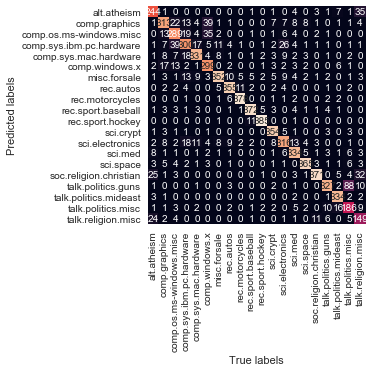

In [33]:
mat=confusion_matrix(test.target,labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False
           , xticklabels=train.target_names
           , yticklabels=train.target_names)
plt.xlabel("True labels")
plt.ylabel("Predicted labels")

In [34]:
print('accuracy %s' % accuracy_score(labels, test.target))
print(classification_report(test.target, labels,target_names=categories))

accuracy 0.8436006372809347
                          precision    recall  f1-score   support

             alt.atheism       0.82      0.76      0.79       319
           comp.graphics       0.73      0.80      0.76       389
 comp.os.ms-windows.misc       0.77      0.73      0.75       394
comp.sys.ibm.pc.hardware       0.71      0.77      0.74       392
   comp.sys.mac.hardware       0.83      0.86      0.84       385
          comp.windows.x       0.84      0.76      0.80       395
            misc.forsale       0.82      0.90      0.86       390
               rec.autos       0.91      0.90      0.90       396
         rec.motorcycles       0.96      0.95      0.95       398
      rec.sport.baseball       0.92      0.94      0.93       397
        rec.sport.hockey       0.97      0.96      0.97       399
               sci.crypt       0.95      0.89      0.92       396
         sci.electronics       0.77      0.80      0.79       393
                 sci.med       0.89      0.84  

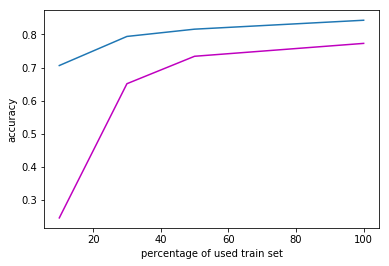

'Blue line represents logistic regression and pink one is naive bayes'

In [9]:
#accuracy results with respect to percentage of used train set
import matplotlib.pyplot as plt
x = [10, 30, 50, 100]
y_nb = [0.245, 0.651, 0.734, 0.773] #naive bayes
plt.plot(x, y_nb,color='m')
y_logistic = [0.706, 0.794, 0.816, 0.843] #logistic regression
plt.plot(x, y)
plt.xlabel('percentage of used train set')
plt.ylabel('accuracy')
plt.show()
("Blue line represents logistic regression and pink one is naive bayes")